In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Khởi tạo dữ liệu

In [8]:
# Tạo các cột theo các phân phối khác nhau
df = pd.DataFrame({"beta": np.random.beta(5, 1, 1000) * 60,
                  "exponential": np.random.exponential(10, 1000),
                  "normal_p": np.random.normal(10, 2, 1000),
                  "normal_l": np.random.normal(10, 10, 1000),})
df.head(10)

,beta,exponential,normal_p,normal_l
0,40.063465,10.822609,8.774766,13.084682
1,54.618732,8.499455,8.142325,7.415997
2,59.709560,10.643620,10.000620,0.012309
3,54.756138,7.175043,10.487487,0.068904
4,53.681512,0.866740,10.599192,4.006960
5,34.562927,4.847397,7.625764,25.118902
6,42.916711,9.213690,10.990347,7.585131
7,46.764899,21.052185,8.793945,21.073171
8,57.920685,5.560108,12.012838,10.308673
9,41.290041,14.122331,13.255564,8.448612


In [9]:
# Thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

df["bimodal"] = bimodal

df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,40.063465,10.822609,8.774766,13.084682,19.712020
1,54.618732,8.499455,8.142325,7.415997,19.954729
2,59.709560,10.643620,10.000620,0.012309,25.912950
3,54.756138,7.175043,10.487487,0.068904,16.290172
4,53.681512,0.866740,10.599192,4.006960,22.963968


### Trực quan hóa dữ liệu

<AxesSubplot:ylabel='Density'>

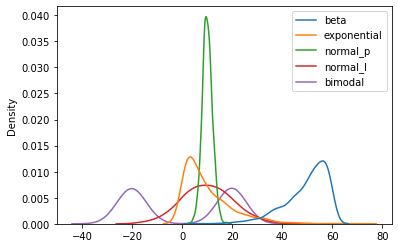

In [10]:
sns.kdeplot(data = df)

### Hiển thị thống kê về dữ liệu sinh ra

In [11]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.793152,10.098572,10.109886,10.151251,-0.131515
std,8.570288,9.810940,2.016284,10.204429,20.205383
min,7.251676,0.014714,3.115712,-18.619875,-28.761442
25%,45.311099,2.790336,8.794144,3.094017,-20.137531
50%,52.158740,7.032852,10.043328,10.044284,-1.698478
75%,56.410875,14.580859,11.373543,17.005131,19.794371
max,59.986959,70.224006,18.064362,49.132841,29.491614


### Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

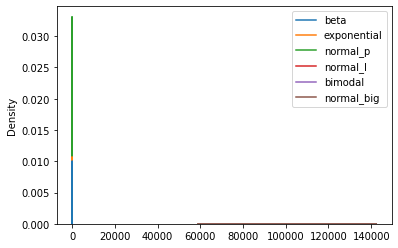

In [12]:
normal_big = np.random.normal(100000, 10000, (1000, 1))

df["normal_big"] = normal_big
sns.kdeplot(data = df)

<AxesSubplot:>

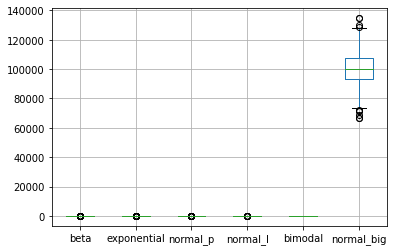

In [13]:
# Trực quan hóa bằng biểu đồ box plot
df.boxplot()

### Chuẩn hóa với StandardScaler (Z-Score scaling)

In [14]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [15]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# Lấy danh sách cho cột
col_names = list(df.columns)

# Truyền về DataFrame, gắn các cột df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns = col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.135849,0.073836,-0.662500,0.287610,0.982583,-0.905475
1,0.563341,-0.163075,-0.976323,-0.268180,0.994601,0.673124
2,1.157647,0.055583,-0.054219,-0.994080,1.289631,-0.163641
3,0.579382,-0.298136,0.187370,-0.988531,0.813145,-0.333013
4,0.453929,-0.941444,0.242799,-0.602421,1.143608,-0.620985


<AxesSubplot:ylabel='Density'>

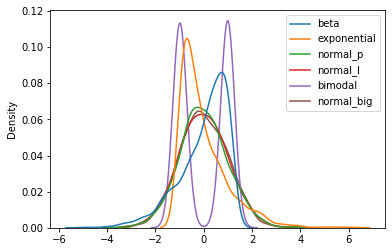

In [16]:
# Biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data = df_s)

In [17]:
# Thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,-8.011369e-16,-1.314504e-16,-7.887024e-16,-9.325873e-17,0.000000,1.374012e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00
min,-4.966316e+00,-1.028332e+00,-3.470580e+00,-2.820885e+00,-1.417655,-3.246539e+00
25%,-5.232373e-01,-7.452795e-01,-6.528846e-01,-6.919313e-01,-0.990628,-6.742009e-01
50%,2.761602e-01,-3.126360e-01,-3.302656e-02,-1.048762e-02,-0.077591,-3.297879e-02
75%,7.725568e-01,4.570948e-01,6.270395e-01,6.719935e-01,0.986661,6.755355e-01
max,1.190031e+00,6.131473e+00,3.947091e+00,3.821977e+00,1.466834,3.303609e+00


<AxesSubplot:>

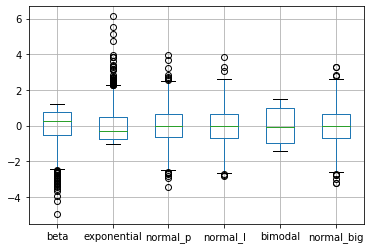

In [18]:
# Trực quan hóa bằng biểu đồ box plot
df_s.boxplot()